# Multiple Linear Regression (MLR)

_**Regression models**_ are used to describe relationships between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable (_y_) changes as the independent variable(s) (_x_) change.

_**Multiple linear regression**_ is used to estimate the relationship between __*two or more independent variables*__ and _**one dependent variable**_. You can use multiple linear regression when you want to know:
1. How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
2. The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).

In Machine Learning, we treat the independent variables (_x<sub>i</sub>_) as __*features*__. Where, for _**i = 1, 2, ... , n**_ features.

#### Assumptions
1. **Linear Assumption** — model assumes the relationship between variables is linear
2. **No Noise** — model assumes that the input and output variables are not noisy — so remove outliers if possible
3. **No Collinearity** — model will overfit when you have highly correlated input variables
4. **Normal Distribution** — the model will make more reliable predictions if your input and output variables are normally distributed. If that’s not the case, try using some transforms on your variables to make them more normal-looking
5. **Rescaled Inputs** — use scalers or normalizer to make more reliable predictions

## Main ideas
- Training a linear regression model means calculating the best coefficients for the line equation formula
- **Gradient descent** can be used to obtain the optimal coefficients
    - An iterative optimization algorithm that calculates derivatives wrt. (with relation to) each coefficient, and updates the coefficients on the go
    - One additional parameter - *learning rate*, specifies the rate at which coefficients are updated
        - High learning rate can lead to "missing" the best values
        - Low learning rate can lead to slow optimization


## Formula of multiple linear regression
The model for multiple linear regression, given _n_ observations, is:
### _y = β<sub>0</sub> + β<sub>1</sub>x<sub>1</sub> + β<sub>2</sub>x<sub>2</sub> + ... + β<sub>n</sub>x<sub>n</sub> + ϵ_
where, for _**i = 1, 2, ... , n**_ observations:
- _**y**_ = the predicted value of the dependent variable
- _**β<sub>0</sub>** = the y-intercept (value of _y_ when all other parameters are set to 0). Also called __*bias*__
- _**β<sub>1</sub>x<sub>1</sub>**_ = the regression coefficient (_β<sub>1</sub>_) of the first independent variable (_x<sub>1</sub>_) (a.k.a. the effect that increasing the value of the independent variable has on the predicted _y_ value)
- _**β<sub>2</sub>x<sub>2</sub>**_ = the regression coefficient (_β<sub>2</sub>_) of the second independent variable (_x<sub>2</sub>_)
- **…** = do the same for however many independent variables you are testing
- _**β<sub>n</sub>x<sub>n</sub>**_ = the regression coefficient of the last independent variable
- _**ϵ**_ = model error (a.k.a. how much variation there is in our estimate of _y_)


#### Line equation
- We can simplify the equation above by calculating an array of _**weights**_ and a single __*bias*__ through gradient descent
- **weights** = slopes, **bias** = y intercept
- We're still solving a simple line equation:

$$\large
\hat{y} = wx + b
$$

#### We also need a **cost function**
- Function we want to minimize
- Reducing the cost (loss) leads to better equation parameters
- We'll use Mean Squared Error (MSE), but feel free to work with any other

$$\large
MSE = \frac{1}{N} \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

<br>

#### $\hat{y} $ can be further written into:

$$ \large
MSE = \frac{1}{N} \sum_{i=1}^{n} (y_i - (wx_i + b))^2
$$

<br>

- To update **weights** and **biases**, we're using gradient descent
- It relies on partial derivatives calculation for each parameter
- Below you'll find derived MSE wrt. each parameter:

$$ \large
\partial_w = \frac{1}{N} \sum_{i=1}^{n} 2x_i(\hat{y} - y)
$$

<br>

$$\large
\partial_b = \frac{1}{N} \sum_{i=1}^{n} 2(\hat{y} - y)
$$

<br>

- This $ 2 $ can be ommited, or you can leave it - it's not important
- Next, we're updating the existing weights and bias according to the following formulas:

$$\large
w = w - \alpha \cdot \partial_w
$$

<br>

$$\large
b = b - \alpha \cdot \partial_b
$$

- Where $ \alpha $ is the learning rate
- This process is then repeated for a predefined number of iterations
- Let's see this in action

In [1]:
# Import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## 1. Create regression model from scratch using Gradient Descent

In [2]:
class LinearRegression:
    '''
    A class which implements linear regression algorithm using gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
    
    
    def mean_squared_error(self, y, y_hat):
        '''
        Calculate to calculate the mean squared error.
        
        :param y: array, true values
        :param y_hat: array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        mse = error / len(y)
        return mse
    
    
    def fit(self, X, y):
        '''
        Calculate the coefficients of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self.mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate partial derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients and intercept
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
    
    def predict(self, X):
        '''
        Make predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

## 2. Load dataset

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

In [4]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


## 4. Train Test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Train the model and make predictions

In [6]:
# Instantiate model
model = LinearRegression(learning_rate=0.1, n_iterations=10000)

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = model.mean_squared_error(y_test, y_pred)

# Print results
print("Coefficients:", model.weights)
print('Intercept:', model.bias)
print('Mean squared error (MSE): %.2f'% mse)

Coefficients: [  39.94287168 -236.73691303  550.27903554  340.35799984  -97.98337603
 -127.09233857 -216.01875955  148.73838367  411.06220505   71.82626752]
Intercept: 151.30379478388505
Mean squared error (MSE): 2880.20


## 6. Plotting the Cost Function

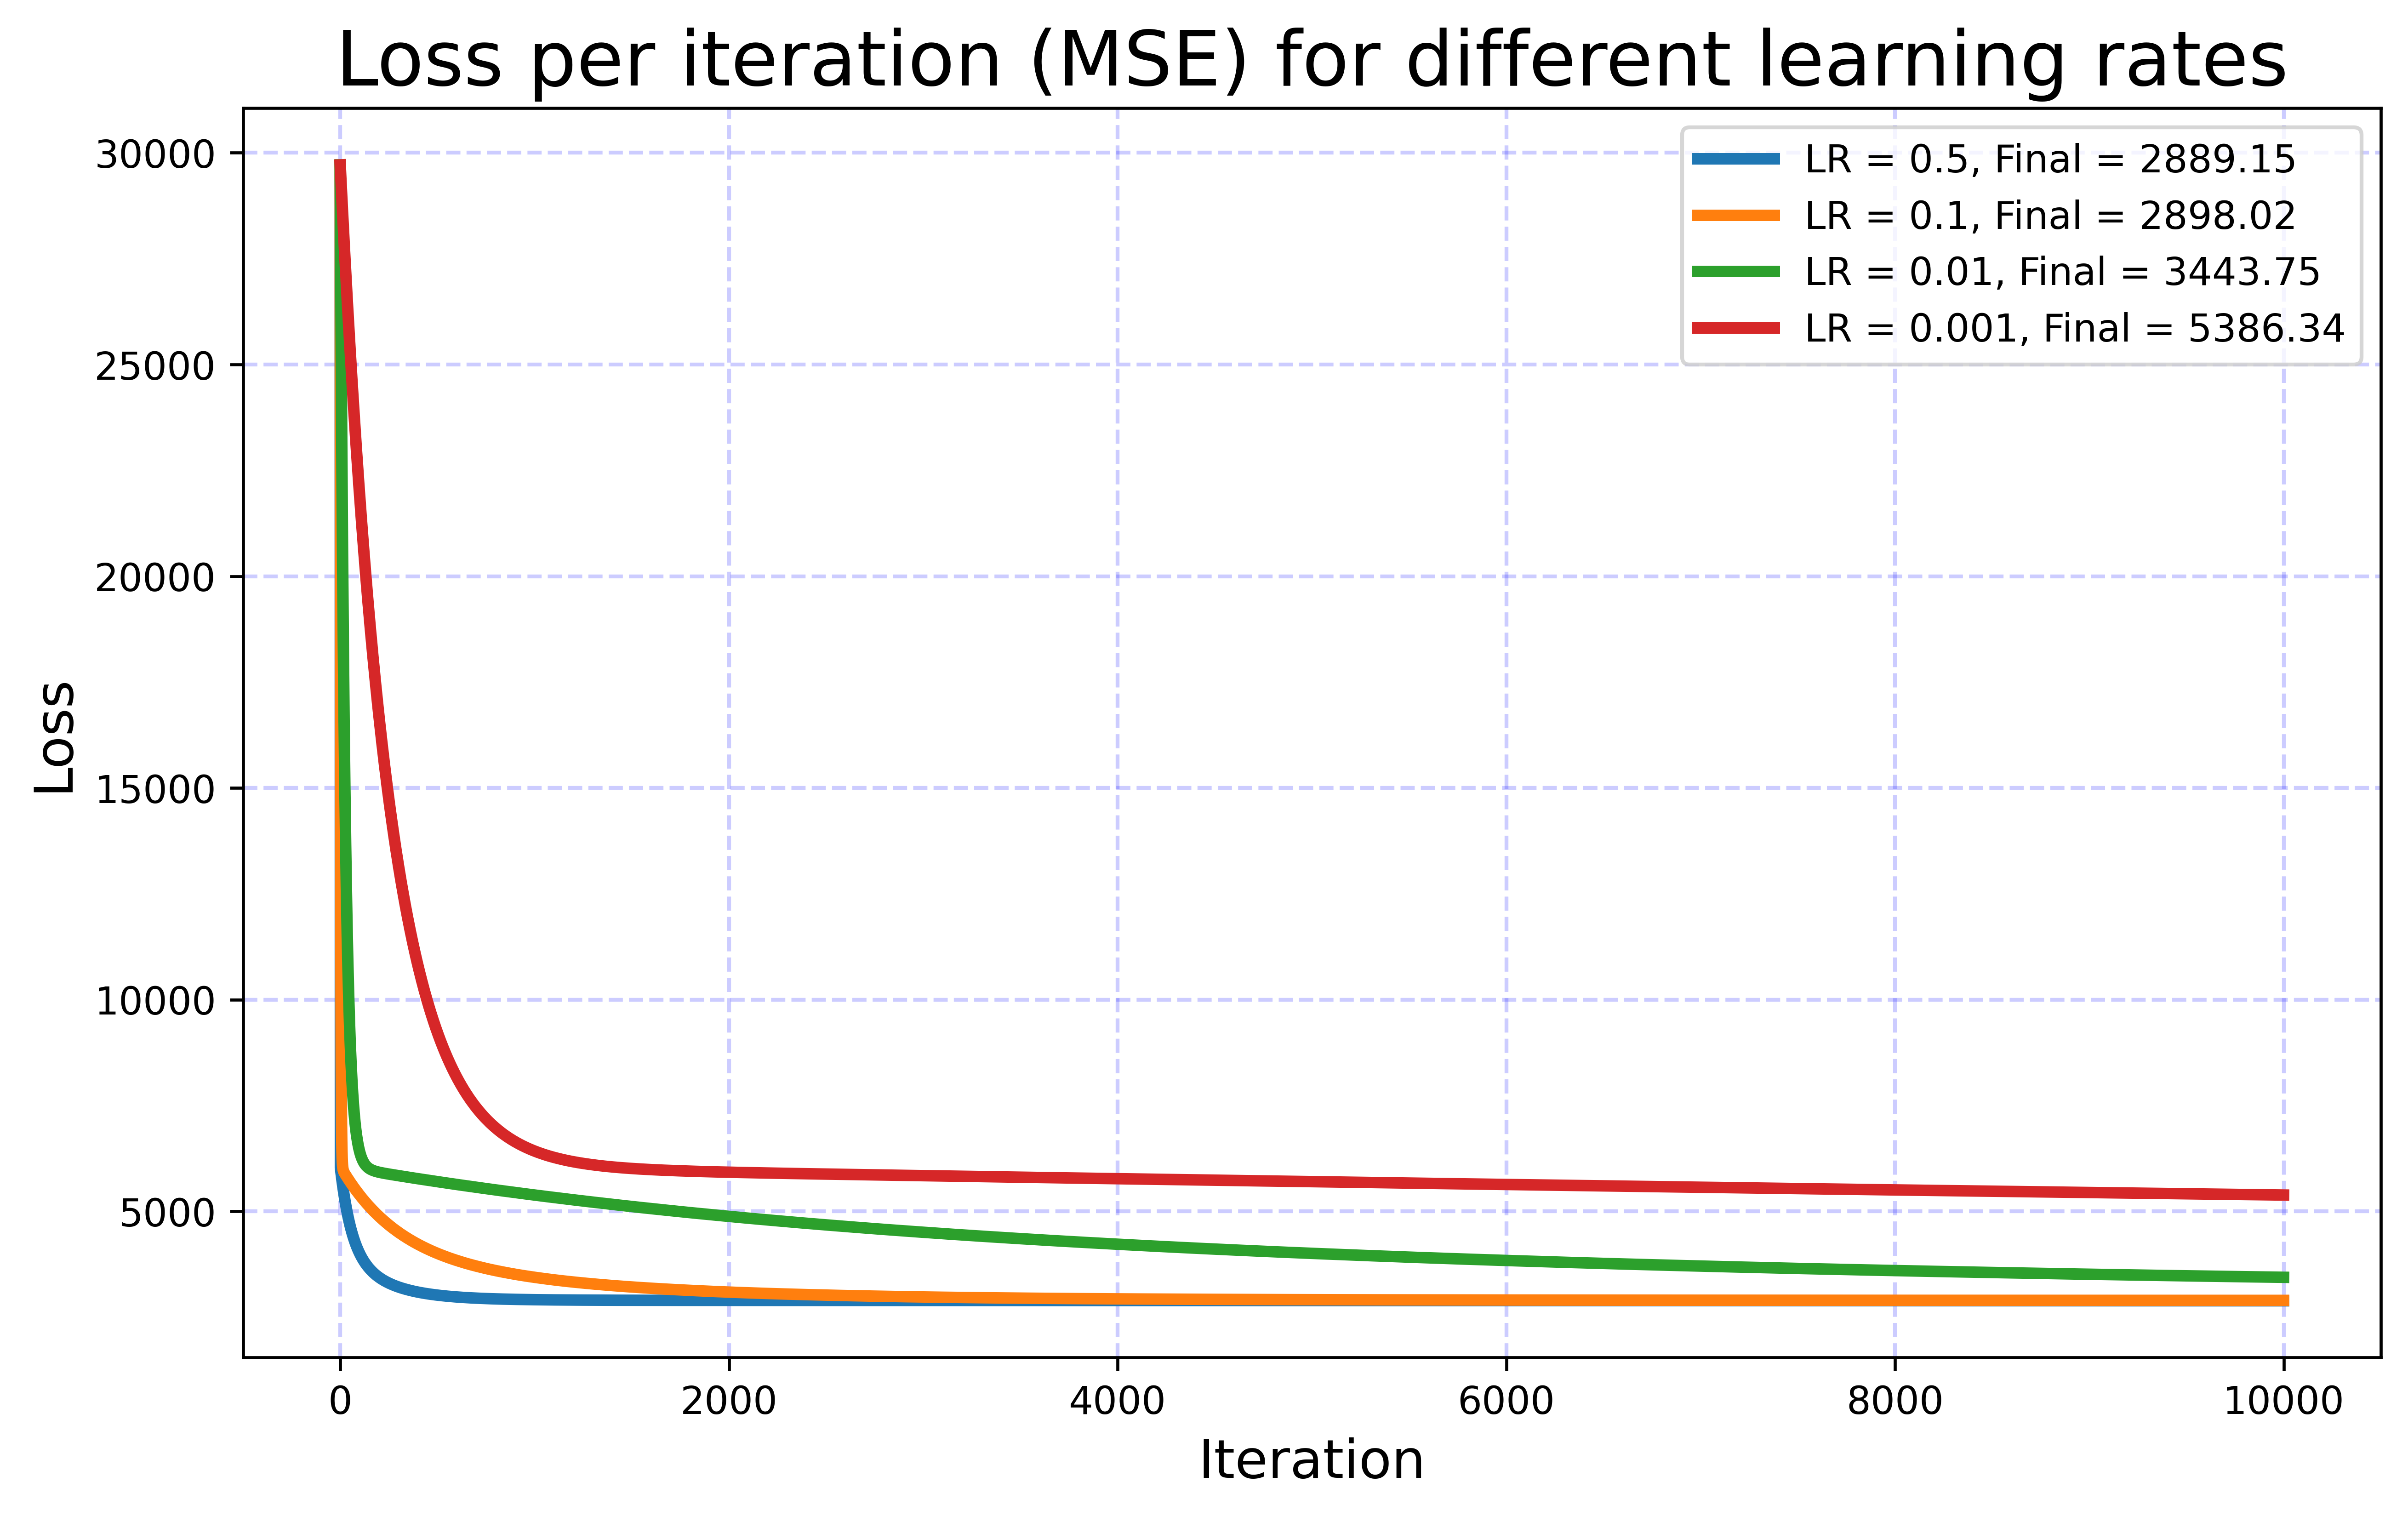

In [7]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

# Plot Linear Regression graph
plt.figure(figsize=(10,6), dpi=600)
plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
plt.title('Loss per iteration (MSE) for different learning rates', size=20)
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
# plt.savefig('Loss_Multiple_Regression.jpg')
plt.show()

## 7. Comparing our model with scikit-learn

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Instantiate model
model = linear_model.LinearRegression()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse_sklearn = mean_squared_error(y_test, y_pred)

# Print results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mse_sklearn)
print('Coefficient of determination (R^2): %.2f'% r2_score(y_test, y_pred))

Coefficients: [  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Intercept: 151.3456553477407
Mean squared error (MSE): 2900.17
Coefficient of determination (R^2): 0.45


## 8. Comparing both model performances

In [10]:
mse_data = {'Our model MSE': [mse], 'Scikit-learn MSE': [mse_sklearn]}
df = pd.DataFrame(data=mse_data)
df

,Our model MSE,Scikit-learn MSE
0,2880.197256,2900.173288
